<a href="https://colab.research.google.com/github/ryuhyunwoo1/classDeepLearning/blob/main/practices/practices_week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 5

## Generalization : The goal of machine learning

**Optimization(最適化)** refers to the process of adjusting a model to get the best performance possible on the training data

**Generalization(一般化)** refers to how well the trained model performs on data it has never seen before

The processing of fighting overfitting is called **regularization(正規化)**

In [1]:
# Rare features and suspicious correlations:
## Datasets that include rare feature values are highly susceptible to overfitting

## Adding white noise channels or all-zeros channels to MNIST
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels) , _ = mnist.load_data()
train_images = train_images.reshape( (60000, 28 * 28) )
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis = 1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis = 1)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
## Training the same model on MNIST data with noise channels or all-zero channels
from tensorflow import keras
from tensorflow.keras import layers

def get_model() :
  model = keras.Sequential([
      layers.Dense(512, activation = "relu"),
      layers.Dense(10, activation = "softmax")
  ])
  model.compile(optimizer = "rmsprop",
                loss = "sparse_categorical_crossentropy",
                metrics = ["accuracy"])
  return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs = 10,
    batch_size = 128,
    validation_split = 0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs = 10,
    batch_size = 128,
    validation_split = 0.2)

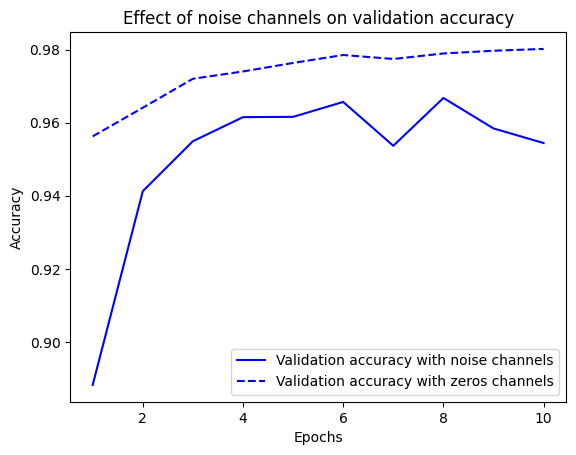

In [5]:
## plotting a validation accuracy comparison
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label = "Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label = "Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

## Evaluating machine-learning models

Tuning *parameters* and *hyperparameters* is a form of *learning*

Tuning is based on its performance on validation set

Tuning a lot would cause *information leak*

Thus, you need never-before-seen test dataset

**Simple hold-out validation**

**K fold validation**

## Improving model fit

To achieve the perfect fit, you must first overfit. Since you don't know in advance where the boundary lies, you must cross it to find it.

Once you have such a model, you'll focus on refining generalization by fighting overfitting.

Three common problems: 1) training loss doesn't go down, 2) model doesn't meaningfully generalize, 3) training and validation loss both go down but model still underfitting.

In [8]:
# Tuning key gradient descent parameters

## Training an MNIST model with an incorrectly high learnign late。
## 学習率が大きすぎて、過学習になる
(train_images, train_labels) , _ = mnist.load_data()
train_images = train_images.reshape( (60000, 28 * 28) )
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation = "relu"),
    layers.Dense(10, activation = "softmax")
])
model.compile(optimizer = keras.optimizers.RMSprop(1.),
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
model.fit(train_images, train_labels,
          epochs = 10,
          batch_size = 128,
          validation_split = 0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 755.2908 - accuracy: 0.2855 - val_loss: 2.1493 - val_accuracy: 0.1673
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 3.4372 - accuracy: 0.1932 - val_loss: 5.2838 - val_accuracy: 0.2075
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 2.8249 - accuracy: 0.1491 - val_loss: 2.8140 - val_accuracy: 0.2012
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 2.5238 - accuracy: 0.1525 - val_loss: 2.2030 - val_accuracy: 0.1733
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3789 - accuracy: 0.1867 - val_loss: 2.2176 - val_accuracy: 0.2114
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4335 - accuracy: 0.2000 - val_loss: 2.2203 - val_accuracy: 0.1931
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3318 - accuracy: 0.1923 - val_loss: 2.2993 - val_accuracy: 0.2086
Epoc

In [9]:
## The same model with a more appropriate learning rate
model = keras.Sequential([
    layers.Dense(512, activation = "relu"),
    layers.Dense(10, activation = "softmax")
])
model.compile(optimizer = keras.optimizers.RMSprop(1e-2),
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
model.fit(train_images, train_labels,
          epochs = 10,
          batch_size = 128,
          validation_split = 0.2)

Epoch 1/10
375/375 [==============================] - 3s 4ms/step - loss: 0.3519 - accuracy: 0.9114 - val_loss: 0.1640 - val_accuracy: 0.9538
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1264 - accuracy: 0.9646 - val_loss: 0.1344 - val_accuracy: 0.9675
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0969 - accuracy: 0.9735 - val_loss: 0.1641 - val_accuracy: 0.9629
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0813 - accuracy: 0.9792 - val_loss: 0.1426 - val_accuracy: 0.9706
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0664 - accuracy: 0.9824 - val_loss: 0.2042 - val_accuracy: 0.9659
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0590 - accuracy: 0.9855 - val_loss: 0.1514 - val_accuracy: 0.9730
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0508 - accuracy: 0.9878 - val_loss: 0.1902 - val_accuracy: 0.9749
Epoch 

In [10]:
## Using bigger model is better to decrease Loss
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3704 - accuracy: 0.8940 - val_loss: 0.2018 - val_accuracy: 0.9402
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 0.1659 - accuracy: 0.9506 - val_loss: 0.1507 - val_accuracy: 0.9568
Epoch 3/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1162 - accuracy: 0.9662 - val_loss: 0.1418 - val_accuracy: 0.9582
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0902 - accuracy: 0.9726 - val_loss: 0.1313 - val_accuracy: 0.9623
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0715 - accuracy: 0.9783 - val_loss: 0.0988 - val_accuracy: 0.9712
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0588 - accuracy: 0.9818 - val_loss: 0.0992 - val_accuracy: 0.9716
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0497 - accuracy: 0.9846 - val_loss: 0.0951 - val_accuracy: 0.9737
Epoch 

## Improving generalization

### Reducing the network's size

In [11]:
# Reducing the network's size
## The simplest way to prevent overfitting is to reduce the size of the model

from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 3s 66ms/step - loss: 0.5631 - accuracy: 0.7706 - val_loss: 0.4474 - val_accuracy: 0.8481
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3656 - accuracy: 0.8879 - val_loss: 0.3372 - val_accuracy: 0.8814
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2731 - accuracy: 0.9114 - val_loss: 0.3071 - val_accuracy: 0.8789
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2214 - accuracy: 0.9251 - val_loss: 0.3085 - val_accuracy: 0.8742
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1867 - accuracy: 0.9385 - val_loss: 0.2750 - val_accuracy: 0.8892
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1596 - accuracy: 0.9484 - val_loss: 0.3018 - val_accuracy: 0.8788
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1380 - accurac

In [12]:
## version of the model with lower capacity
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 74ms/step - loss: 0.5823 - accuracy: 0.7757 - val_loss: 0.4857 - val_accuracy: 0.8567
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.4183 - accuracy: 0.8851 - val_loss: 0.3923 - val_accuracy: 0.8705
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3284 - accuracy: 0.9050 - val_loss: 0.3351 - val_accuracy: 0.8823
Epoch 4/20
30/30 [==============================] - 1s 45ms/step - loss: 0.2715 - accuracy: 0.9178 - val_loss: 0.3036 - val_accuracy: 0.8879
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2308 - accuracy: 0.9299 - val_loss: 0.2868 - val_accuracy: 0.8905
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2014 - accuracy: 0.9384 - val_loss: 0.2852 - val_accuracy: 0.8861
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1781 - accuracy: 0.9435 - val_loss: 0.2823 - val_accuracy: 0.8873
Epoch 8/20
30

In [13]:
## version of the model with higher capacity, 過学習
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 4s 70ms/step - loss: 0.5733 - accuracy: 0.7179 - val_loss: 0.3481 - val_accuracy: 0.8707
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3136 - accuracy: 0.8699 - val_loss: 0.2935 - val_accuracy: 0.8786
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2402 - accuracy: 0.9051 - val_loss: 0.2677 - val_accuracy: 0.8893
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1873 - accuracy: 0.9278 - val_loss: 0.2807 - val_accuracy: 0.8883
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1321 - accuracy: 0.9515 - val_loss: 0.4113 - val_accuracy: 0.8541
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0961 - accuracy: 0.9654 - val_loss: 0.8083 - val_accuracy: 0.7683
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 0.0825 - accuracy: 0.9707 - val_loss: 0.3446 - val_accuracy: 0.8859
Epoch 8/20
30

### **Adding weight regularization**

Simpler models are less likely to overfit than complex ones


In [14]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer = regularizers.l2(0.002),
                 activation = "relu"),
    layers.Dense(16,
                 kernel_regularizer = regularizers.l2(0.002),
                 activation = "relu"),
    layers.Dense(1, activation = "sigmoid")
])

In [ ]:
## Different weight regularizers available in Keras
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

### **Adding dropout**

Randomly dropping out (setting to zero) a number of output features of the layer during training

In [16]:
## 50% dropout
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 85ms/step - loss: 0.6553 - accuracy: 0.6081 - val_loss: 0.5650 - val_accuracy: 0.8382
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.5479 - accuracy: 0.7471 - val_loss: 0.4472 - val_accuracy: 0.8457
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4579 - accuracy: 0.8150 - val_loss: 0.3706 - val_accuracy: 0.8662
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3959 - accuracy: 0.8536 - val_loss: 0.3209 - val_accuracy: 0.8819
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3405 - accuracy: 0.8796 - val_loss: 0.3000 - val_accuracy: 0.8825
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2930 - accuracy: 0.9036 - val_loss: 0.2811 - val_accuracy: 0.8892
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2624 - accuracy: 0.9152 - val_loss: 0.2763 - val_accuracy: 0.8907
Epoch 8/20
30